In [1]:
import pandas as pd

import matplotlib as mt
import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

from scipy import stats as st

import plotly.express as px

## Предобработка данных

Получим общую информацию о табличке, предварительные наблюдения

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()
data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Названия столбцов следует указать в нижнем регистре.<p>
Name не назначен для двух игр. Возможно, есть смысл их убрать из таблицы.<p>
Genre не назначен для двух игр. Возможно, есть смысл их убрать из таблицы.<p>
Year_of_Release - нужно будет изменить формат в даты или int, также - заполнить пустые ячейки.<p>

Critic_Score - много NaN, возможно, есть смысл, заменить их на среднее/медиану<p>
User_Score - много NaN, возможно, есть смысл, заменить их на среднее/медиану. Также следует формат изменить на float.<p>
Rating - более половины значений - NaN.<p>

In [3]:
no_name = data.query('Name.isnull()')
no_name

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Данные о двух пропущенных играх удалю в дальнейшем, т.к. данных об этих играх недостаточно для включения их в выборку. 

In [4]:
data.columns = data.columns.str.lower()

Привел названия столбцов к нижнему регистру.

### Изменение типов данных + обработка пропусков

In [5]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('int')
data.info()
data['year_of_release'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

Заполнил пропуски медианой, привел к типу float для удобства обработки, т.к. в оценка в данной колонке - это целые числа.

In [6]:
data['user_score'].value_counts()
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype(float)

Заменил значения tbd на NaN, для приведения данных к общему виду. Также присвоил значениям в колонке тип float для удобства обработки, т.к. в оценка в данной колонке с десятыми долями.

In [7]:
data['rating'] = data['rating'].fillna('Not specified')

Также заменил нули в колонке рейтинга на произвольное значение, для удобства дифференциации, т.к. самостоятельно рейтинг игры мы определить не сможем.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16446 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [9]:
data = data.dropna(subset=['name'])

Также удалил две игры из таблицы, т.к.: <p>
 - Название/Жанр - ключевая связка в данном контексте.<p>
 - Это незначительно повлияет на выборку.<p>

###### Вывод по пропускам данных:
- В столбцах critic_score и user_score - пропуски, предположительно, связаны с отсутствием достаточного количества оценок для публикации общей.
- В Name и Genre - возможно, не было адекватной локализации игры, в связи с чем она не попала на отдельные рынки.
- Year_of_Release - мог быть не заполнен из-за старости игры или человеческого фактора.

### Создание нового столбца

In [10]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16444, dtype: float64

Создал столбец с общей суммой продаж во всех регионах.

In [11]:
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Анализ данных

### Количество игр по годам

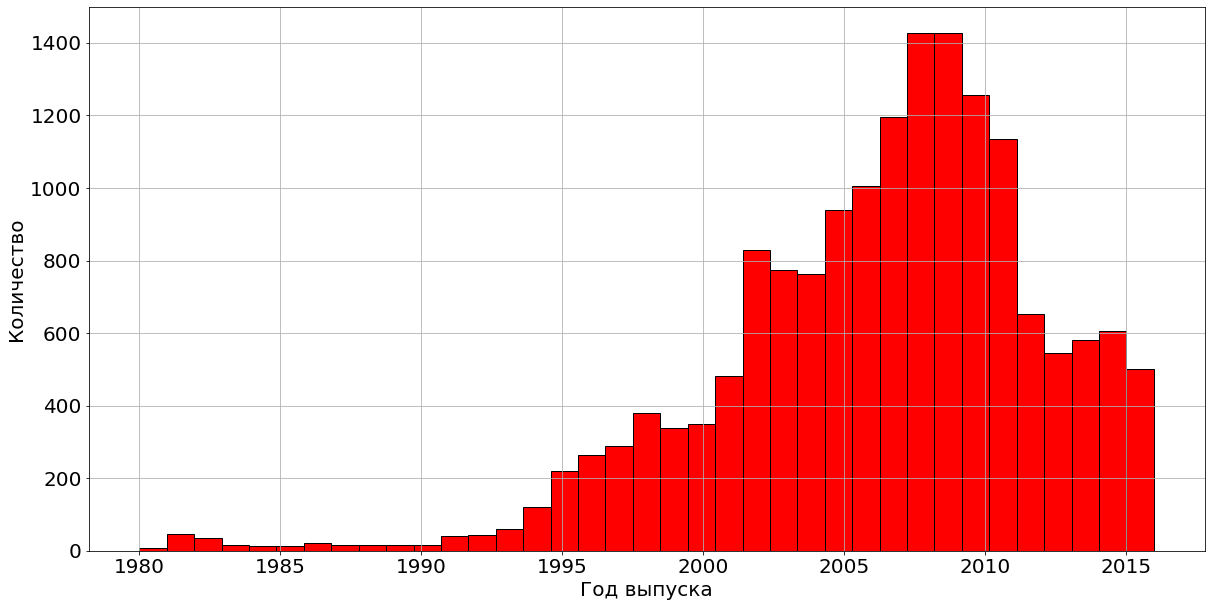

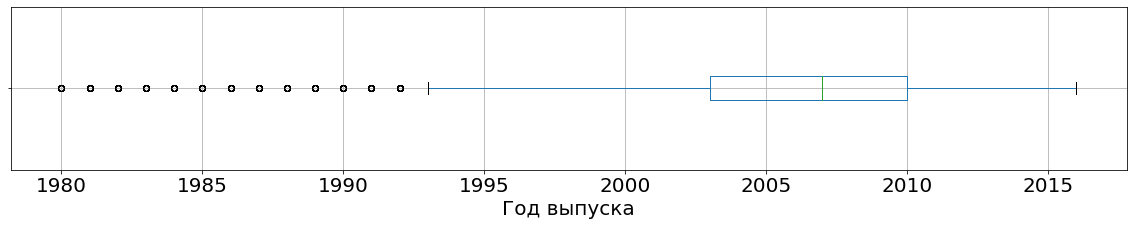

In [12]:
data['year_of_release'].hist(bins=37, figsize=(20,10), xlabelsize =20, 
                          ylabelsize=20, facecolor='red', ec='black') 

plt.suptitle('')
plt.xlabel('Год выпуска', fontsize=20)
plt.ylabel('Количество', fontsize=20)
plt.show()

print()

game_year_temp=data.boxplot('year_of_release', vert=False, figsize=(20,3), fontsize=20)
game_year_temp.set_yticklabels([''])
plt.xlabel('Год выпуска', fontsize=20)
plt.show()

In [13]:
data = data.query('year_of_release > 1992')

Данные до 1993 года не так важны, т.к. игр выпускалось достаточно мало, к тому же - они подрастеряли свою актуальность. Удалил их для упрощения дальнейшей актуализации данных.

### Продажи по платформам

Рассмотрим продажи игр на различных платформах, для этого применим гистограмму.

In [15]:
sales_per_plat=data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()

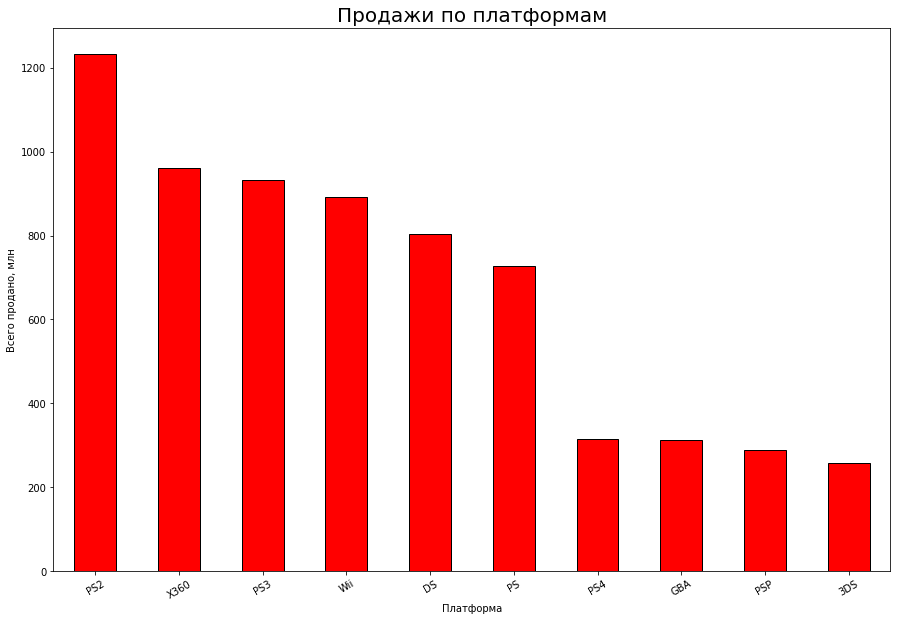

In [16]:
top_sales_per_plat=sales_per_plat.iloc[0:10,0:10]
ax=top_sales_per_plat.plot(x='platform', y='total_sales', kind='bar', figsize=(15, 10), rot=30, facecolor='red', ec='black')
print()
ax.get_legend().remove()
plt.title('Продажи по платформам', size=20)
plt.xlabel('Платформа')
plt.ylabel('Всего продано, млн')
plt.show()

Заметил шесть лидеров по продажам за всё время.

In [17]:
top_sales_per_plat=sales_per_plat.iloc[0:10,0:10]
top_plat=top_sales_per_plat['platform'].tolist()
top_plat

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

Создал список платформ с наибольшими продажами.

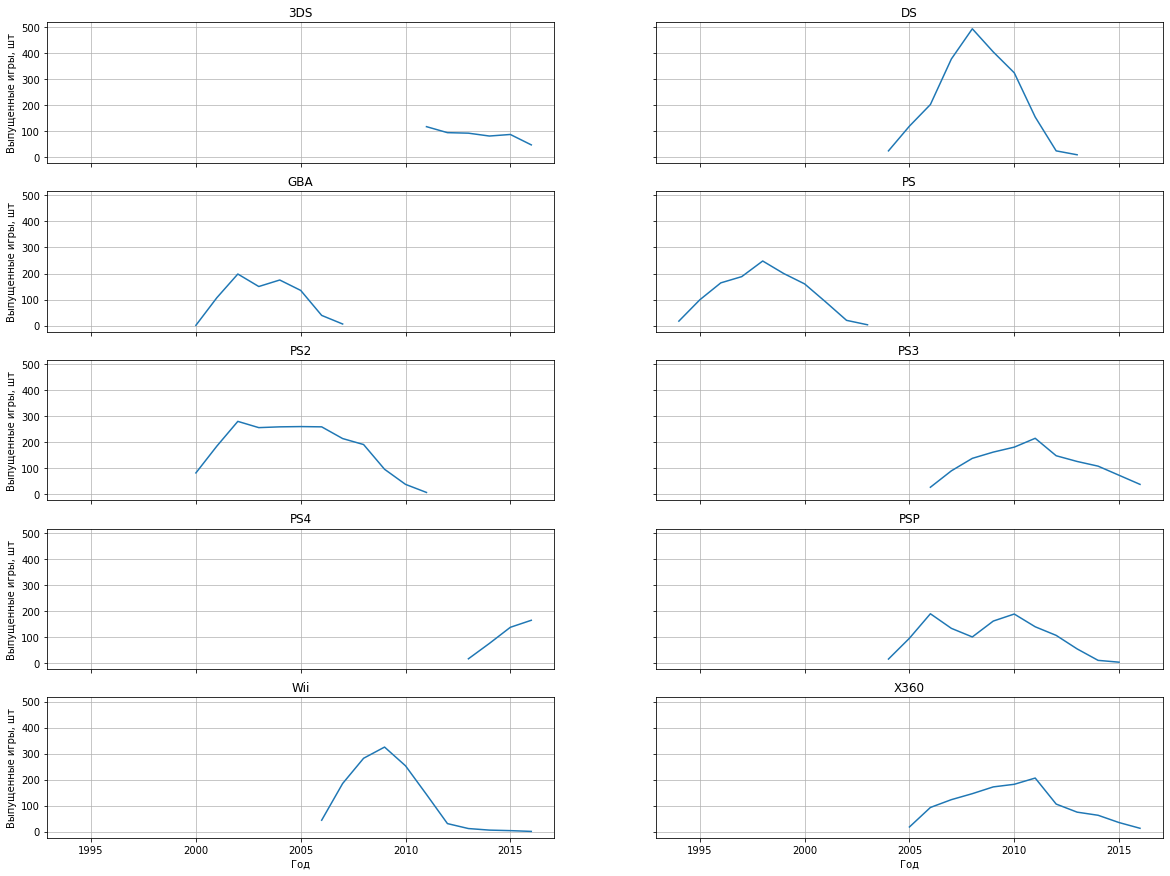

In [18]:
top_pl_sales=data.drop(data[data.year_of_release == 0].index)
top_pl_sales=top_pl_sales.query('platform==@top_plat')
top_pl_sales['platform']=top_pl_sales['platform'].astype('object')

top_pl_sales_plot=top_pl_sales.groupby(['year_of_release','platform']).count()['total_sales'].reset_index()

fig, axes = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(20,15))
ax_list = [item for sublist in axes for item in sublist]

for plat, a in top_pl_sales_plot.groupby('platform'):
    ax = ax_list.pop(0)
    a.plot(x='year_of_release', y='total_sales', ax=ax, legend=False)
    ax.set_title(plat)
    ax.grid(linewidth=0.7)
    ax.set_xlabel("Год")
    ax.set_ylabel("Выпущенные игры, шт")

Построил графики по годам для платформ с наибольшими продажами (за всё время).

In [19]:
lifetime_min = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min']).round(2)
lifetime_max = data.pivot_table(index='platform', values='year_of_release', aggfunc=['max']).round(2)
lifetime  = lifetime_max['max'] - lifetime_min['min']
lifetime_mean = lifetime.sort_values('year_of_release', ascending=False).mean().round(1)
lifetime_mean

year_of_release    6.1
dtype: float64

Можно заметить, что средний срок жизни платформы (период с ее появления на рынке - до исчезновения) равен приблизительно 6,7 годам. Эти данные можно использовать для дальнейших прогнозов.

По следующим платформам выпуск игр уже не ведется: <p>
 - DS
 - PS
 - PS2
 - GBA
    
Их дальнейшее использование в выборке нецелесообразно.

### Актуализация данных

In [20]:
newdata = data[data['year_of_release'] > 2012]
top=['X360', 'Wii', 'PS3', 'PS4', 'PSP', '3DS', 'PC', 'PSV', 'XOne']

Создал таблицу на основании актуальных данных. <p>
Также создал список платформ, данные о которых могут быть полезны в дальнейшем.

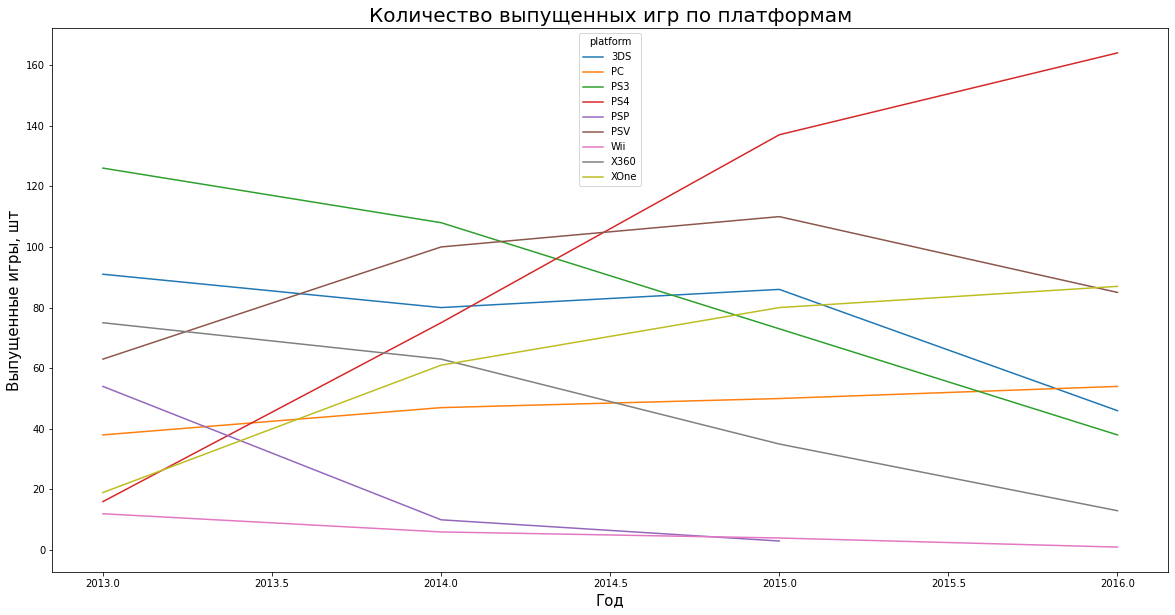

In [21]:
sales_top=newdata.query('platform==@top').copy()

fig, ax = plt.subplots(figsize=(20,10))
sales_top.groupby(['year_of_release','platform']).count()['total_sales'].unstack().plot(ax=ax)
plt.title('Количество выпущенных игр по платформам', size=20)
plt.xlabel('Год', size=15)
plt.ylabel('Выпущенные игры, шт', size=15)
plt.show()

Заметим, что положительную тенденцию по выпущенным играм показывают платформы PS4, X-Box One и PC. Как следствие - они являются потенциально прибыльными. <p>
 - PS4 как удачная платформа на графике демонстрирует сильный взлет на начальном этапе своего жизненного цикла.
 - X-Box One демонстрирует более быстрый спад в продажах, тем не менее тренд остается восходящим, так что данные об этой платформе актуальны для исследования.
 - PC демонстрирует медленный восходящий тренд, значит, точно не теряет своей актуальности и по сей день.

### Глобальные продажи видеоигр

Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

Text(9.924999999999997, 0.5, 'Продажи, млн')

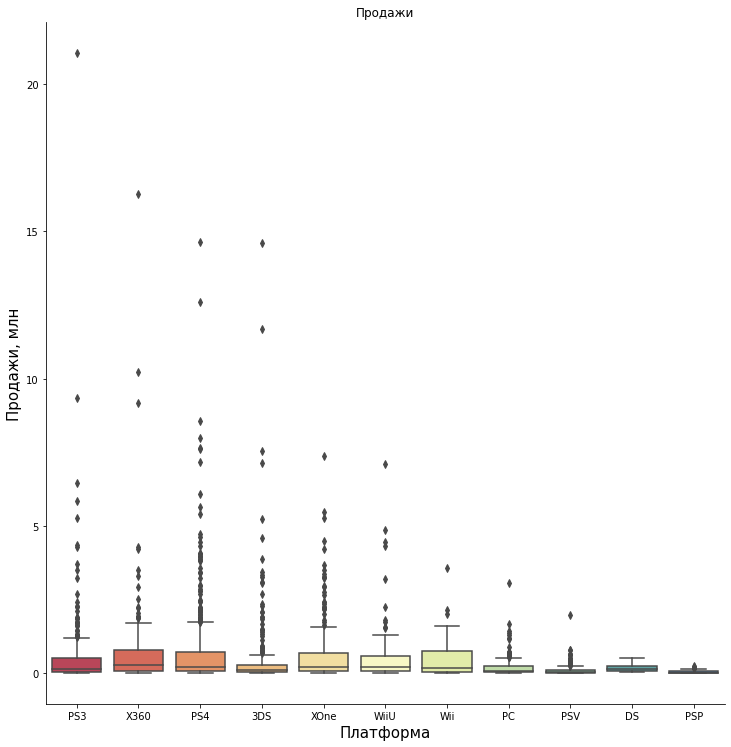

In [22]:
sns.catplot(x="platform", y='total_sales', kind="box", data=newdata, height=10, palette='Spectral')
plt.title('Продажи')
plt.xlabel('Платформа', size=15)
plt.ylabel('Продажи, млн', size=15)

На общем графике заметны выбросы в десятки миллионов проданных копий.

(0.0, 2.5)

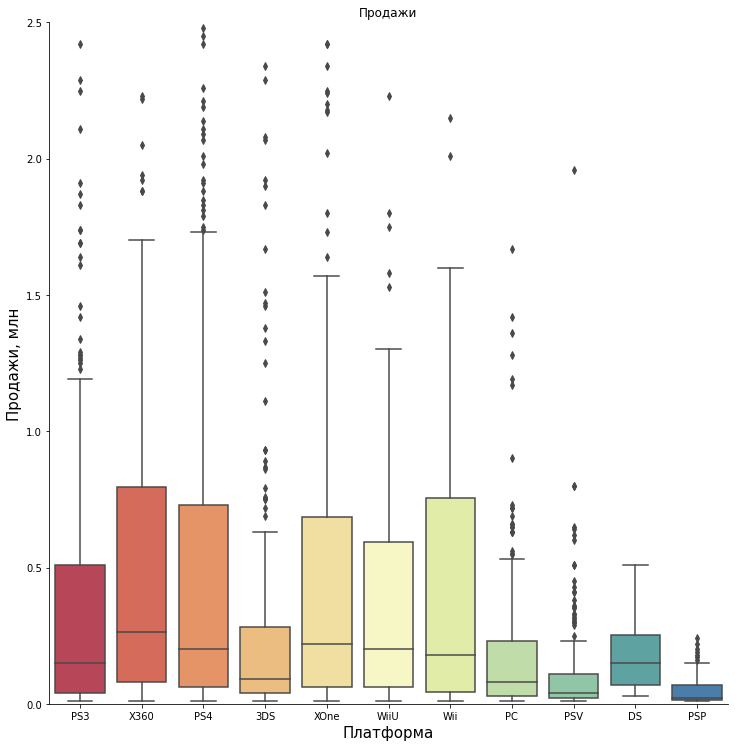

In [23]:
sns.catplot(x="platform", y='total_sales', kind="box", data=newdata, height=10, palette='Spectral')

plt.title('Продажи')
plt.xlabel('Платформа', size=15)
plt.ylabel('Продажи, млн', size=15)
plt.ylim(0, 2.5)

Медианные продажи у платформ, в основном колеблются на уровне ~200-300 тысяч.
Также у многих платформ заметны выбросы, которые свидетельствуют об играх, проданных в количествах нескольких миллионов и даже десятков миллионов копий.

### Влияние отзывов критиков и пользователей на продажи

#### Построим диаграмму рассеяния для PS4.

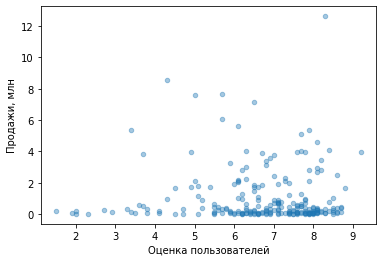

Коэффициент корелляции равен -0.01907507140454871


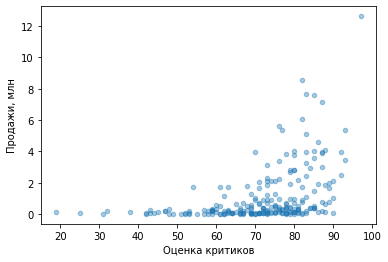

Коэффициент корелляции равен 0.4225256118664904


In [24]:
ps4_scores = newdata.query('platform == "PS4"').groupby(['user_score', 'critic_score']).agg({'total_sales':'sum'}).reset_index()

ps4_scores.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.4)

plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.show()

print('Коэффициент корелляции равен '  + ps4_scores['user_score'].corr(ps4_scores['total_sales']).astype('str'))


ps4_scores.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.4)

plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
plt.show()

print('Коэффициент корелляции равен ' + ps4_scores['critic_score'].corr(ps4_scores['total_sales']).astype('str'))

Корелляция между продажами игр для PS4 и оценками пользователей - очень слабая отрицательная. В случае с оценкой критиков - слабая, приближена к средней.
Вероятно, пользователи мало руководствуются отзывами при покупке игры.

#### Построим диаграмму рассеяния для PC.

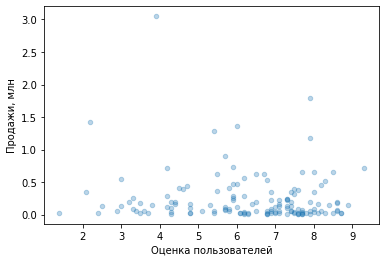

Коэффициент корелляции равен -0.09798668565979597


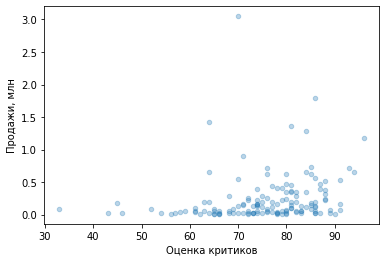

Коэффициент корелляции равен 0.19632308195665055


In [25]:
pc_scores = newdata.query('platform == "PC"').groupby(['user_score', 'critic_score']).agg({'total_sales':'sum'}).reset_index()

pc_scores.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3)

plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.show()

print('Коэффициент корелляции равен '  + pc_scores['user_score'].corr(pc_scores['total_sales']).astype('str'))


pc_scores.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3)

plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
plt.show()

print('Коэффициент корелляции равен ' + pc_scores['critic_score'].corr(pc_scores['total_sales']).astype('str'))

Корелляция между продажами и отзывами в случае с оценкой пользователей - очень слабая, в случае с оценкой критиков - очень слабая.

#### Построим диаграмму рассеяния для X-Box One.

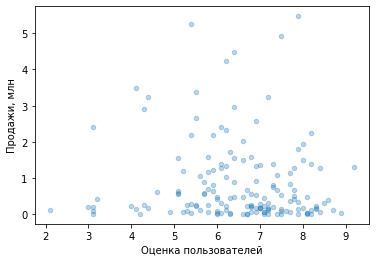

Коэффициент корелляции равен -0.06890877476322112


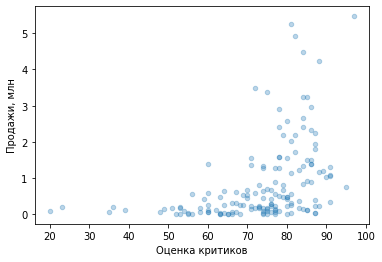

Коэффициент корелляции равен 0.4206863033258797


In [26]:
xone_scores = newdata.query('platform == "XOne"').groupby(['user_score', 'critic_score']).agg({'total_sales':'sum'}).reset_index()

xone_scores.plot(kind='scatter', x='user_score', y='total_sales', alpha=0.3)

plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, млн')
plt.show()

print('Коэффициент корелляции равен '  + xone_scores['user_score'].corr(xone_scores['total_sales']).astype('str'))


xone_scores.plot(kind='scatter', x='critic_score', y='total_sales', alpha=0.3)

plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, млн')
plt.show()

print('Коэффициент корелляции равен ' + xone_scores['critic_score'].corr(xone_scores['total_sales']).astype('str'))

Корелляция между продажами и отзывами в случае с оценкой пользователей - очень слабая отрицательная, в случае с оценкой критиков - слабая, приближена к средней.

Вывод: На каждой из представленных платформ корелляция продаж с оценками пользователей очень слабая, а взаимосвязь продаж с оценками критиков - варьируется от очень слабой до приближенной к средней (слабой).

### Распределение игр по жанрам

Сгруппируем данные и построим столбчатую диаграмму для сравнения продаж в разбивке по жанрам.

In [27]:
genre_group = newdata.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()

,genre,total_sales
0,Action,321.87
1,Shooter,232.98
2,Sports,150.65
3,Role-Playing,145.89
4,Misc,62.82
5,Platform,42.63
6,Racing,39.89
7,Fighting,35.31
8,Adventure,23.64
9,Simulation,21.76


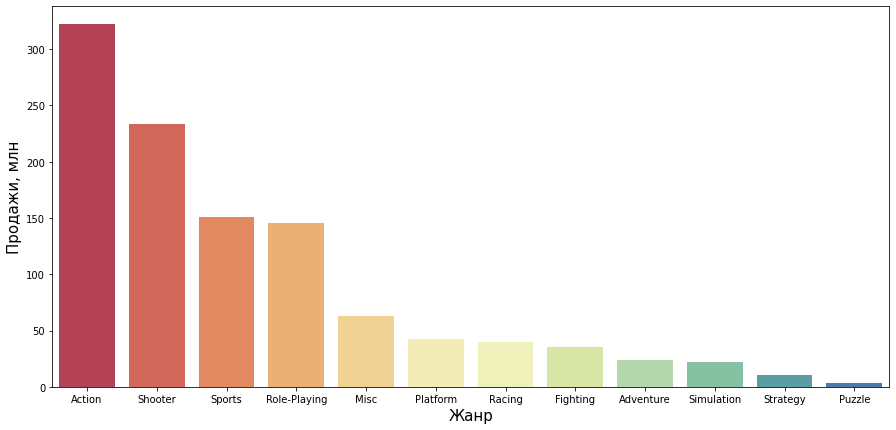

In [28]:
plt.figure(figsize=(15, 7))
sns.barplot(data=genre_group, x='genre',  y='total_sales', palette="Spectral")
plt.xlabel('Жанр', size=15)
plt.ylabel('Продажи, млн', size=15)

genre_group

In [29]:
temp1, temp2 = newdata.total_sales.sum(), data[data['year_of_release'] > 2008].total_sales.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(1090.69, 3203.0600000000004, 65.95)

(0.0, 2.0)

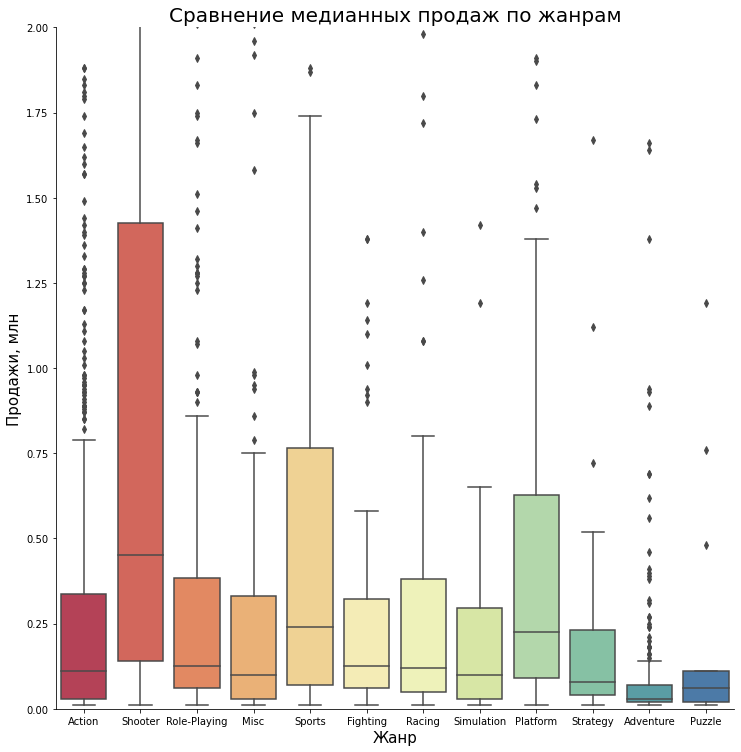

In [30]:
sns.catplot(x="genre", y='total_sales', kind="box", data=newdata, height=10, palette='Spectral')

plt.title('Сравнение медианных продаж по жанрам', size=20)
plt.xlabel('Жанр', size=15)
plt.ylabel('Продажи, млн', size=15)
plt.ylim(0, 2)

Вывод: При сравнении медиан продаж игр различных жанров, можно заметить, что (при исключении выбросов в десятки миллионов продаж) лучше всего на протяжении последних лет продавались игры жанра Shooter (с медианой ~400 тыс. продаж) почти с двухкратным преимуществом перед играми жанра Sports и Platform. <p>
Игры самого непопулярного жанра Adventure, для сравнения, продались объемом всего в ~30 тысяч копий. 

### Портрет пользователя для различных регионов

Для удобства, составил круговые диаграммы по популярности платформ.

#### Самые популярные платформы

[Text(0, 0.5, '')]

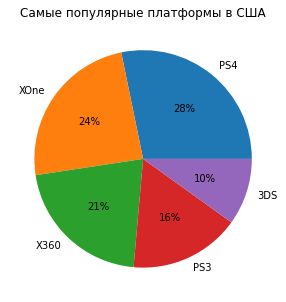

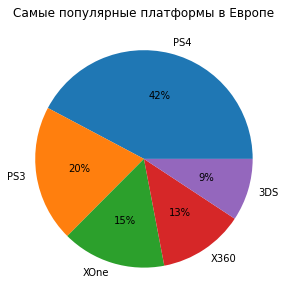

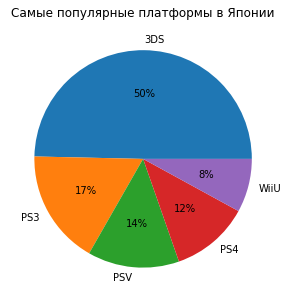

In [32]:
na_sales = newdata.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_sales.columns = ['na_sales']
na_sales.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title="Самые популярные платформы в США", figsize=(5, 5)).set(ylabel='')

eu_sales = newdata.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_sales.columns = ['eu_sales']
eu_sales.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title="Самые популярные платформы в Европе", figsize=(5, 5)).set(ylabel='')

jp_sales = newdata.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_sales.columns = ['jp_sales']
jp_sales.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, title="Самые популярные платформы в Японии", figsize=(5, 5)).set(ylabel='')

Наиболее популярная платформа в США и Европе - PS4, в Японии - 3DS. <p>
PS4 также входит в тройку самых популярных платформ Японии.

#### Самые популярные жанры

[Text(0, 0.5, '')]

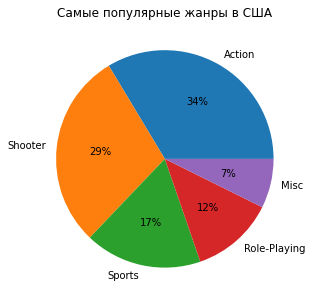

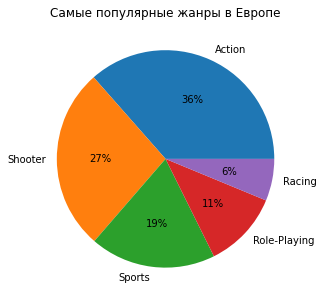

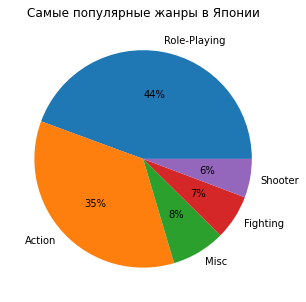

In [34]:
na_genres = newdata.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_genres.columns = ['na_sales']
na_genres.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title="Самые популярные жанры в США", figsize=(5, 5)).set(ylabel='')

eu_genres = newdata.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genres.columns = ['eu_sales']
eu_genres.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title="Самые популярные жанры в Европе", figsize=(5, 5)).set(ylabel='')

jp_genres = newdata.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_genres.columns = ['jp_sales']
jp_genres.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, title="Самые популярные жанры в Японии", figsize=(5, 5)).set(ylabel='')

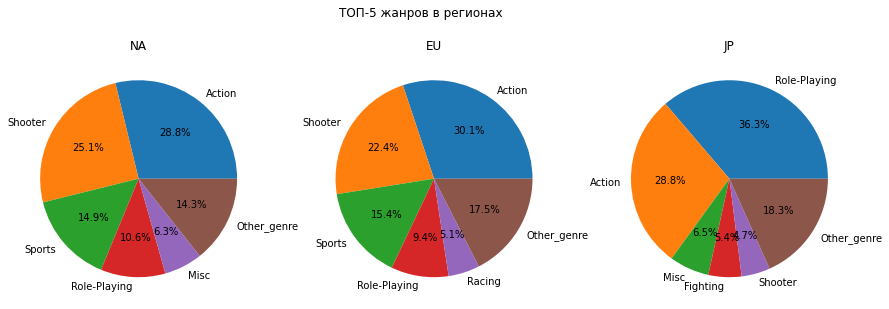

In [40]:
games_fresh = newdata.copy()
countries = games_fresh.columns[4:7]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 жанров в регионах')
for i in range(3):

  df_i = (games_fresh.groupby('genre')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))

  df_i = df_i.append({'genre': 'Other_genre', countries[i]: games_fresh[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  
  axs[i].pie(df_i[countries[i]], labels = df_i['genre'], autopct='%1.1f%%')
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

Наиболее предпочтитаемый игровой жанр в Европе и США - Action. Как можно заметить - рынки интересов к различным жанрам в данных регионах практически идентичны.
В Японии предпочтение отдается жанру RPG, Action же занимает второе место.

#### Зависимость продаж от рейтинга

[Text(0, 0.5, '')]

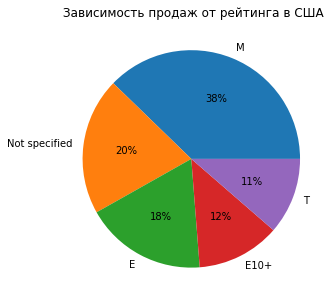

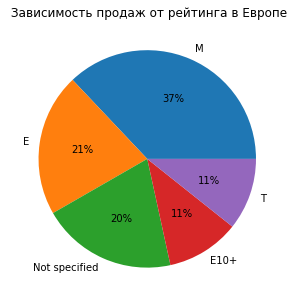

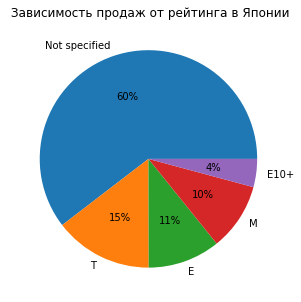

In [35]:
na_genres = newdata.pivot_table(index='rating', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_genres.columns = ['na_sales']
na_genres.plot(kind='pie',y="na_sales", autopct='%1.0f%%', legend=False, title=" Зависимость продаж от рейтинга в США", figsize=(5, 5)).set(ylabel='')

eu_genres = newdata.pivot_table(index='rating', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genres.columns = ['eu_sales']
eu_genres.plot(kind='pie',y="eu_sales", autopct='%1.0f%%', legend=False, title=" Зависимость продаж от рейтинга в Европе", figsize=(5, 5)).set(ylabel='')

jp_genres = newdata.pivot_table(index='rating', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_genres.columns = ['jp_sales']
jp_genres.plot(kind='pie',y="jp_sales", autopct='%1.0f%%', legend=False, title=" Зависимость продаж от рейтинга в Японии", figsize=(5, 5)).set(ylabel='')

В рамках игрового сегмента, рейтинг которого определен по стандартам ESRB, лидирующую позицию среди возрастных рейтингов в Европе и США занимает М (Mature) - занимающий немалый сегмент в рамках самой популярной игровой категории. В Японии среди фаворитов - рейтинг T (Игры для детей старше 13 лет).

В результате анализа данных, были выявлены следующие портреты пользователей из различных регионов: <p>
 - США - играет в Action-игры с рейтингом M на платформе PS4.
 - Европа - играет в Action-игры с рейтингом M на платформе PS4.
 - Япония - играет в RPG-игры с рейтингом T на платформе 3DS.

## Гипотезы
### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые <p>
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные <p>

In [36]:
pc_score = newdata.query('platform == "PC" & user_score > 0')['user_score']

xbox_score = newdata.query('platform == "XOne" & user_score > 0')['user_score']

alpha = 0.05
results  = st.ttest_ind(pc_score, xbox_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


Была заложена вероятность ошибки в 5%, т.к. данные в таблице неполны. Большая вероятность отвергнуть гипотезу по ошибке.

In [37]:
display(pc_score.mean(), xbox_score.mean())

6.2696774193548395

6.521428571428572

Нулевая гипотеза (средние рейтинги Xbox One и PC одинаковые) оказалась верной. <p>
В следствие проверки гипотезы, было выявлено, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые (близки по значению).

### Средние пользовательские рейтинги жанров Action и Sports - разные

In [38]:
action_score = newdata.query('genre == "Action" & user_score > 0')['user_score']

sports_score = newdata.query('genre == "Sports" & user_score > 0')['user_score']

alpha = 0.05
results  = st.ttest_ind(action_score, sports_score)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389140023e-27
Отвергаем нулевую гипотезу


Была заложена вероятность ошибки в 5%, т.к. данные в таблице неполны. Большая вероятность отвергнуть гипотезу по ошибке.

In [39]:
display(action_score.mean(), sports_score.mean())

6.837532133676092

5.238124999999999

Нулевая гипотеза (средние рейтинги жанров Action и Sports одинаковые) оказалась ложной, верной оказалась альтернативная (средние рейтинги разные). <p>
В следствие проверки гипотезы, было выявлено, что средние пользовательские рейтинги жанров Action и Sports различаются.

# Общий вывод

- Для создания максимально правильной компании на 2017 год, следует ориентироваться на платформы PS4 и XBox-One.
- Игры жанра Action с большой вероятностью принесут выгоду интернет-магазину, а шутеры - успешно дополнят арсенал. Данные два жанра охватывают более 50% ЦА в Европе и США. При построении рекламной кампании следует сфокусироваться именно на этих жанрах.
- Для японского рынка - оптимальными вариантами для продаж станут RPG и Action-игры рейтинга эквивалентного T по системе ESRB.
- Рейтинг M у видеоигры также может принести новые продажи в Европе и Америке. Как правило, в комбинации с вышеуказанными жанрами такой рейтинг предполагает реализм, что, вероятно, и нравится современным игрокам.
- На отзывы об играх внимание обращать не стоит, т.к. между продажами и отзывами критиков корелляция слабая, а между продажами и отзывами игроков - очень слабая. <p>
    
- Если же максимально сузить выборку то я рекомендовал бы потратить средства на продвижение игр жанра Action с рейтингом M. Даже при условии незначительной популярности в Японии, такая игра с огромной вероятностью захватит рынки Европы и Америки.